# 前情提要，这个文件是用来做数据预处理的，把数据做成合适的模样，然后为class dataset所用

In [4]:
img_path = "/root/APS360_Project/Datasets/IAM_Extracted/images/a01-000u.png"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(img_path)
plt.imshow(img, cmap='gray')  # Specify colormap as grayscale
plt.axis('off')
plt.show()


KeyboardInterrupt



In [ ]:
def get_img_data(img_path):
    img = mpimg.imread(img_path)
    return img

img_data = get_img_data(img_path)
print(img_data.shape)

(3542, 2479)


In [ ]:
# extract files
import os
compressed_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM/"
extracted_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/"
for file in os.listdir(compressed_path):
    if file == "ascii.tgz":
        os.system("tar -xvzf " + compressed_path + file + " -C " + extracted_path)
    else:
        os.system("tar -xvf " + compressed_path + file + " -C " + extracted_path + "images/")

./
forms.txt
lines.txt
words.txt
sentences.txt
a01-000u.png
a01-000x.png
a01-003.png
a01-003u.png
a01-003x.png
a01-007.png
a01-007u.png
a01-007x.png
a01-011.png
a01-011u.png
a01-011x.png
a01-014.png
a01-014u.png
a01-014x.png
a01-020.png
a01-020u.png
a01-020x.png
a01-026.png
a01-026u.png
a01-026x.png
a01-030.png
a01-030u.png
a01-030x.png
a01-038.png
a01-038x.png
a01-043.png
a01-043u.png
a01-043x.png
a01-049.png
a01-049u.png
a01-049x.png
a01-053.png
a01-053u.png
a01-053x.png
a01-058.png
a01-058u.png
a01-058x.png
a01-063.png
a01-063u.png
a01-063x.png
a01-068u.png
a01-072u.png
a01-072x.png
a01-077.png
a01-077u.png
a01-082u.png
a01-087.png
a01-087u.png
a01-091.png
a01-091u.png
a01-096u.png
a01-102.png
a01-102u.png
a01-107.png
a01-107u.png
a01-113.png
a01-113u.png
a01-117.png
a01-117u.png
a01-122.png
a01-122u.png
a01-128.png
a01-128u.png
a01-132.png
a01-132u.png
a01-132x.png
a02-000.png
a02-004.png
a02-008.png
a02-012.png
a02-017.png
a02-020.png
a02-024.png
a02-027.png
a02-032.png
a02-037.pn

In [ ]:
# 检查一下，确保images文件夹下只有图片文件
import os
img_folder = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/images/"
for file in os.listdir(img_folder):
    if file[-3:] != "png":
        print(file)

forms.txt
lines.txt
words.txt
sentences.txt


# 报错
因为之前已经创建过文件夹了
所以这个代码只能运行一次

In [ ]:
for file in os.listdir("/root/autodl-tmp/APS360_Project/Datasets/IAM"):
    if file.endswith(".txt"):
        os.system("mv /root/APS360_Project/Datasets/IAM/" + file + " /root/APS360_Project/Datasets/IAM_Extracted/")

# 上面两段啥意思？
没事问题不大，这只是文件处理的一些操作，运行一遍就行了

### 下面是查看与调整图片的一些代码

(3542, 2479)


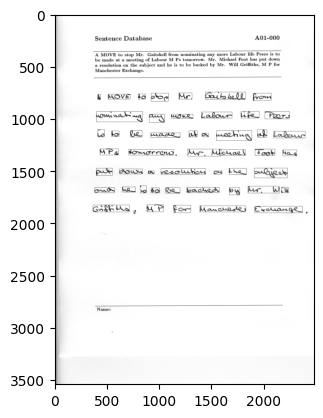

In [ ]:
# read the first image and use red pen to crop the first word in it

def read_img000_word_pos():
    ans = []
    file_path = "/root/APS360_Project/Datasets/IAM_Extracted/words.txt"
    with open(file_path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if line.startswith("#"):
            continue
        if not line.startswith("a01-000u"):
            continue
        # for i, d in enumerate(line.split()):
        #     print(i, d, end=' | ')
        # print()
        x, y, w, h = [int(d) for d in line.split()[3:7]]
        ans.append((x, y, w, h))
    return ans


word_labels = read_img000_word_pos()

img_path = "/root/APS360_Project/Datasets/IAM_Extracted/images/a01-000u.png"
img = mpimg.imread(img_path)
print(img.shape)
lw = 2  # line width
for x, y, w, h in word_labels:
    # img[y:y+h, x:x+lw] = 0
    # img[x+w:x+w+lw, y:y+h] = 0
    # img[x:x+w, y:y+lw] = 0
    # img[x:x+w, y+h:y+h+lw] = 0
    img[y:y+h, x:x+lw] = 0
    img[y:y+h, x+w:x+w+lw] = 0
    img[y:y+lw, x:x+w] = 0
    img[y+h:y+h+lw, x:x+w] = 0
plt.imshow(img, cmap='gray')  # Specify colormap as grayscale

(1024, 1024)


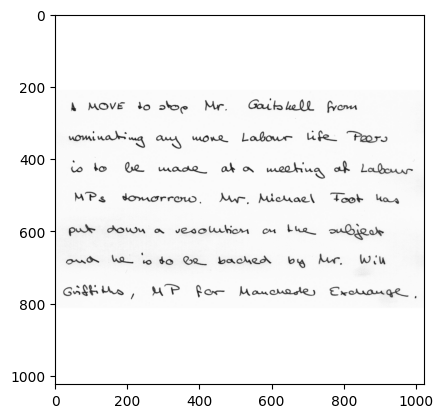

In [ ]:
# 裁剪图片，让其只剩手写的部分
# 注意不能硬编码，应该在 words.txt 文件中找到所有手写单词的坐标，
# 然后根据坐标裁剪图片
# 暂且只处理第一张图片

import matplotlib.pyplot as plt
from PIL import Image

def read_img000_word_pos():
    ans = []
    file_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/words.txt"
    with open(file_path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if line.startswith("#"):
            continue
        if not line.startswith("a01-000u"):
            continue
        # for i, d in enumerate(line.split()):
        #     print(i, d, end=' | ')
        # print()
        x, y, w, h = [int(d) for d in line.split()[3:7]]
        ans.append((x, y, w, h))
    return ans

img_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/images/a01-000u.png"


def read_img(img_path):
    img = Image.open(img_path)
    return img


image = read_img(img_path)
word_positions = read_img000_word_pos()
left, right, top, bottom = 10000, 0, 10000, 0
for x, y, w, h in word_positions:
    left = min(left, x)
    right = max(right, x+w)
    top = min(top, y)
    bottom = max(bottom, y+h)
# leave some margin
margin = 50
left = max(0, left-margin)
right = min(image.size[0], right+margin)
top = max(0, top-margin)
bottom = min(image.size[1], bottom+margin)
image = image.crop((left, top, right, bottom))
# make the image a square by adding white pixels
if image.size[0] > image.size[1]:
    new_size = (image.size[0], image.size[0])
else:
    new_size = (image.size[1], image.size[1])
new_image = Image.new("RGB", new_size, (255, 255, 255))
new_image.paste(image, ((new_size[0]-image.size[0])//2, (new_size[1]-image.size[1])//2))
image = new_image
# resize the image to 1024x1024
image = image.resize((1024, 1024))
plt.imshow(image, cmap='gray')
print(image.size)

## 接下来把上面的代码打包成函数

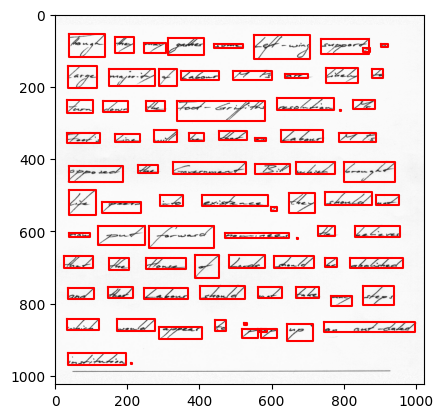

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

def get_cropped_image_and_positions(img_path, words_path, img_name):
    # read the word positions in this image
    word_positions = []
    with open(words_path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if line.startswith("#"):
            continue
        if not line.startswith(img_name + '-'):
            continue
        x, y, w, h = [int(d) for d in line.split()[3:7]]
        word_positions.append((x, y, w, h))

    image = Image.open(img_path)
    left, right, top, bottom = 10000, 0, 10000, 0
    for x, y, w, h in word_positions:
        left = min(left, x)
        right = max(right, x + w)
        top = min(top, y)
        bottom = max(bottom, y + h)
    
    # leave some margin
    margin = 50
    left = max(0, left - margin)
    right = min(image.size[0], right + margin)
    top = max(0, top - margin)
    bottom = min(image.size[1], bottom + margin)
    image = image.crop((left, top, right, bottom))
    # translate the positions of the words
    word_positions = [(x-left, y-top, w, h) for x, y, w, h in word_positions]

    # get the grey-scale value for the rest of the image
    img_temp = np.array(image, dtype=np.float64)
    total = float(img_temp.sum())
    assert len(img_temp.shape) == 2
    num_pixels = img_temp.shape[0] * img_temp.shape[1]
    for pos in word_positions:
        x, y, w, h = pos
        total -= img_temp[y:y+h, x:x+w].sum()
        num_pixels -= w*h
    avg = int(total / num_pixels)

    # make the image a square by adding white pixels
    image = np.array(image)
    if image.shape[0] > image.shape[1]:
        new_size = (image.shape[0], image.shape[0])
    else:
        new_size = (image.shape[1], image.shape[1])
    new_image = np.zeros((new_size[0], new_size[1]), dtype=np.int16)
    new_image.fill(avg)
    new_image += np.random.randint(-20, 20, size=(new_size[0], new_size[1]), dtype=np.int16)  # noise
    new_image[(new_size[0] - image.shape[0]) // 2:(new_size[0] - image.shape[0]) // 2 + image.shape[0],
                (new_size[1] - image.shape[1]) // 2:(new_size[1] - image.shape[1]) // 2 + image.shape[1]] = image
    # translate the positions of the words
    word_positions = [(x + (new_size[1] - image.shape[1]) // 2, y + (new_size[0] - image.shape[0]) // 2, w, h) for x, y, w, h in word_positions]
    image = new_image

    # resize the image to 1024x1024
    image = Image.fromarray(image)
    image = image.resize((1024, 1024))
    # translate the positions of the words
    factor = 1024 / new_size[0]
    word_positions = [(int(x * factor), int(y * factor), int(w * factor), int(h * factor)) for x, y, w, h in word_positions]

    return image, word_positions

def main():
    img_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/images/"
    words_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/words.txt"
    img_name = "a01-003"
    img_suffix = ".png"
    img_path = os.path.join(img_path, img_name + img_suffix)

    image, word_positions = get_cropped_image_and_positions(img_path, words_path, img_name)

    plt.imshow(image, cmap='gray')
    for x, y, w, h in word_positions:
        plt.plot([x, x + w, x + w, x, x], [y, y, y + h, y + h, y], color='red')
    plt.show()

if __name__ == "__main__":
    main()

## 上面的函数，改进一些关于word_position的问题

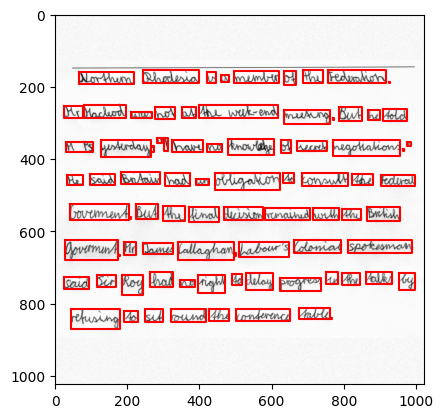

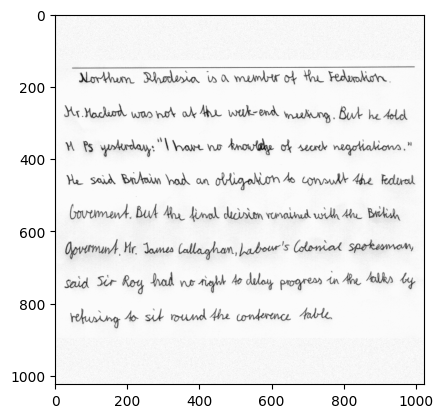

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from WordInfo import WordInfo

def get_cropped_image_and_words(img_path, words_path):
    # read the word positions in this image
    word_informations = []
    with open(words_path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if line.startswith("#"):
            continue
        if not line.startswith(img_name + '-'):
            continue
        # create a new WordInfo object
        word_info = line.split()
        temp = word_info[:8]
        word = ""
        for w in word_info[8:]:
            word += w + " "
        word = word[:-1]
        word_info = temp + [word]
        wi = WordInfo(*word_info)
        if wi.x == -1 and wi.y == -1 and wi.w == -1 and wi.h == -1:
            continue
        word_informations.append(wi)

    image = Image.open(img_path)
    left, right, top, bottom = 10000, 0, 10000, 0
    for wi in word_informations:
        left = min(left, wi.x)
        right = max(right, wi.x + wi.w)
        top = min(top, wi.y)
        bottom = max(bottom, wi.y + wi.h)

    # leave some margin
    margin = 50
    left = max(0, left - margin)
    right = min(image.size[0], right + margin)
    top = max(0, top - margin)
    bottom = min(image.size[1], bottom + margin)
    image = image.crop((left, top, right, bottom))
    # translate the positions of the words
    for wi in word_informations:
        wi.x -= left
        wi.y -= top

    # get the grey-scale value for the rest of the image
    img_temp = np.array(image, dtype=np.float64)
    total = float(img_temp.sum())
    assert len(img_temp.shape) == 2
    num_pixels = img_temp.shape[0] * img_temp.shape[1]
    for wi in word_informations:
        total -= img_temp[wi.y:wi.y+wi.h, wi.x:wi.x+wi.w].sum()
        num_pixels -= wi.w*wi.h
    avg = int(total / num_pixels)

    # make the image a square by adding white pixels
    image = np.array(image)
    if image.shape[0] > image.shape[1]:
        new_size = (image.shape[0], image.shape[0])
    else:
        new_size = (image.shape[1], image.shape[1])
    new_image = np.zeros((new_size[0], new_size[1]), dtype=np.int16)
    new_image.fill(avg)
    new_image += np.random.randint(-20, 20, size=(new_size[0], new_size[1]), dtype=np.int16)  # noise
    new_image[(new_size[0] - image.shape[0]) // 2:(new_size[0] - image.shape[0]) // 2 + image.shape[0],
                (new_size[1] - image.shape[1]) // 2:(new_size[1] - image.shape[1]) // 2 + image.shape[1]] = image
    # translate the positions of the words
    for wi in word_informations:
        wi.x += (new_size[1] - image.shape[1]) // 2
        wi.y += (new_size[0] - image.shape[0]) // 2
    image = new_image

    # resize the image to 1024x1024
    image = Image.fromarray(image)
    image = image.resize((1024, 1024))
    # translate the positions of the words
    factor = 1024 / new_size[0]
    for wi in word_informations:
        wi.x = int(wi.x * factor)
        wi.y = int(wi.y * factor)
        wi.w = int(wi.w * factor)
        wi.h = int(wi.h * factor)

    image = np.array(image)
    # make sure that all pixels are in the range of 0-255
    image[image < 0] = 0
    image[image > 255] = 255
    image = np.array(image, dtype=np.uint8)

    return image, word_informations

img_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/images/"
words_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/words.txt"
img_name = "a01-030"
img_suffix = ".png"
img_path = img_path + img_name + img_suffix

image, word_informations = get_cropped_image_and_words(img_path, words_path)

plt.imshow(image, cmap='gray')

for wi in word_informations:
    plt.plot([wi.x, wi.x + wi.w, wi.x + wi.w, wi.x, wi.x], [wi.y, wi.y, wi.y + wi.h, wi.y + wi.h, wi.y], color='red')

plt.show()
plt.imshow(image, cmap='gray')

## 接下来，使用上面的函数处理所有IAM数据，保存在`IAM_Processed`文件夹下

In [14]:
import os
from PIL import Image
import numpy as np
import torch

processed_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/"
processed_images_path = processed_path + "images/"
processed_words_path = processed_path + "word_info_lists/"
words_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/words.txt"
images_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/images/"

# Create directories if they don't exist
os.makedirs(processed_images_path, exist_ok=True)
os.makedirs(processed_words_path, exist_ok=True)

for i, file in enumerate(os.listdir(images_path), 1):
    img_name, img_ext = os.path.splitext(file)
    temp_image_path = os.path.join(images_path, file)
    temp_processed_img_path = os.path.join(processed_images_path, img_name + ".png")
    temp_processed_words_path = os.path.join(processed_words_path, img_name + ".pt")
    
    image, word_informations = get_cropped_image_and_words(temp_image_path, words_path)
    image = Image.fromarray(image)
    image.save(temp_processed_img_path)
    torch.save(word_informations, temp_processed_words_path)
    
    print(f"{i}. {file}")

1. a01-128.png
2. a01-000u.png
3. a01-128u.png
4. a01-000x.png
5. a01-132.png
6. a01-003.png
7. a01-132u.png
8. a01-003u.png
9. a02-000.png
10. a01-003x.png
11. a01-132x.png
12. a01-007.png
13. a02-004.png
14. a01-007u.png
15. a02-008.png
16. a01-007x.png
17. a02-053.png
18. a01-011.png
19. a02-057.png
20. a01-011u.png
21. a02-062.png
22. a01-011x.png
23. a02-067.png
24. a01-014.png
25. a02-072.png
26. a01-014u.png
27. a02-078.png
28. a01-014x.png
29. a02-082.png
30. a01-020.png
31. a02-086.png
32. a01-020u.png
33. a02-090.png
34. a01-020x.png
35. a02-093.png
36. a01-026.png
37. a02-098.png
38. a01-026u.png
39. a02-102.png
40. a01-026x.png
41. a02-106.png
42. a01-030.png
43. a02-111.png
44. a01-030u.png
45. a02-116.png
46. a01-030x.png
47. a02-120.png
48. a01-038.png
49. a02-124.png
50. a01-038x.png
51. a03-006.png
52. a01-043.png
53. a03-009.png
54. a01-043u.png
55. a03-011.png
56. a01-043x.png
57. a03-014.png
58. a01-049.png
59. a03-017.png
60. a01-049u.png
61. a03-020.png
62. a01-04

## 将每个被红框圈起的单词单独裁剪并分开保存

In [19]:
import os
from PIL import Image

# def get_cropped_word(image, x, y, w, h):
#     """
#     Crop a word from the image using the provided coordinates.
    
#     Args:
#     - image (PIL.Image.Image): The input image.
#     - x, y, w, h (int): The coordinates and dimensions of the word bounding box.
    
#     Returns:
#     - cropped_word (PIL.Image.Image): The cropped word.
#     """
#     # Crop the word from the image using the provided coordinates
#     cropped_word = image.crop((x, y, x + w, y + h))
#     return cropped_word

def save_cropped_word(image, x, y, w, h, word_id, output_folder):
    """
    Crop a word from an image using provided coordinates and save it to the output folder with the specified word ID.
    
    Args:
    - image (PIL.Image.Image): The original image containing the word.
    - x, y, w, h (int): Coordinates and dimensions of the word bounding box.
    - word_id (str): The unique identifier for the word.
    - output_folder (str): Path to the output folder where cropped images will be saved.
    """
    # Crop the word from the image
    if w <= 0 or h <= 0:
        print(f"the width or the height is not positive: {word_id}")
        return
    if x < 0 or y < 0 or x + w > image.size[0] or y + h > image.size[1]:
        print(f"the word is out of the image: {word_id}")
        return
    word_image = image.crop((x, y, x + w, y + h))
    
    # Save the cropped word to the output folder
    output_path = os.path.join(output_folder, f"{word_id}.png")
    word_image.save(output_path)
    
import os
from PIL import Image

def process_IAM_dataset(images_folder, words_file_path, output_folder):
    """
    Process the IAM dataset by cropping words from images using the provided coordinates and saving them to the output folder.
    
    Args:
    - images_folder (str): Path to the folder containing the images.
    - words_file_path (str): Path to the file containing word coordinates.
    - output_folder (str): Path to the output folder where cropped images will be saved.
    """
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Read all word coordinates from the words file
    temp_img_name = ""
    image = None
    count = 0
    with open(words_file_path, 'r') as words_file:
        for line in words_file:
            if line.startswith("#"):
                continue

            # Extract word ID and bounding box coordinates
            word_id, _, _, x, y, w, h, *_ = line.split()
            img_name = "-".join(word_id.split("-")[:2]) + ".png"
            img_path = os.path.join(images_folder, img_name)            

            # print the status
            if temp_img_name != img_name:
                count += 1
                print(f"{count}. processing {img_name}")
                temp_img_name = img_name
                # reload the image
                image = Image.open(img_path)

            # save
            save_cropped_word(image, int(x), int(y), int(w), int(h), word_id, output_folder)

# Example usage:
images_folder = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/images/"
words_file_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Extracted/words.txt"
output_folder = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/cropped_words/"

process_IAM_dataset(images_folder, words_file_path, output_folder)

1. processing a01-000u.png
2. processing a01-000x.png


3. processing a01-003.png
4. processing a01-003u.png
5. processing a01-003x.png
6. processing a01-007.png
7. processing a01-007u.png
8. processing a01-007x.png
9. processing a01-011.png
10. processing a01-011u.png
11. processing a01-011x.png
12. processing a01-014.png
13. processing a01-014u.png
14. processing a01-014x.png
15. processing a01-020.png
16. processing a01-020u.png
17. processing a01-020x.png
18. processing a01-026.png
19. processing a01-026u.png
20. processing a01-026x.png
21. processing a01-030.png
the width or the height is not positive: a01-030-01-04
the width or the height is not positive: a01-030-05-09
22. processing a01-030u.png
23. processing a01-030x.png
24. processing a01-038.png
25. processing a01-038x.png
26. processing a01-043.png
27. processing a01-043u.png
28. processing a01-043x.png
29. processing a01-049.png
30. processing a01-049u.png
31. processing a01-049x.png
32. processing a01-053.png
the width or the height is not positive: a01-053-08-02
33. processin

In [21]:
# 把所有单词图片crop成128x128
import os
from PIL import Image

def crop_word_images(input_folder, output_folder):
    """
    Crop all word images in the input folder to 128x128 pixels and save them to the output folder.
    
    Args:
    - input_folder (str): Path to the folder containing the word images.
    - output_folder (str): Path to the output folder where cropped images will be saved.
    """
    
    # Crop all word images to 128x128 pixels
    for file in os.listdir(input_folder):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)
        
        # pad the image to be a rectangle
        if image.size[0] > image.size[1]:
            new_size = (image.size[0], image.size[0])
        else:
            new_size = (image.size[1], image.size[1])
        new_image = Image.new("RGB", new_size, (255, 255, 255))
        new_image.paste(image, ((new_size[0]-image.size[0])//2, (new_size[1]-image.size[1])//2))
        new_image = new_image.convert("L")
        new_image = new_image.resize((128, 128))
        image = new_image
        print(file)
        # image.show()
        # return
        
        # Save the cropped image to the output folder
        output_path = os.path.join(output_folder, file)
        image.save(output_path)


input_path = '/root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/cropped_words'
output_path = '/root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/cropped_words_rect'
crop_word_images(input_path, output_path)

a01-000u-06-04.png
a01-000u-00-00.png
a01-000u-06-06.png
a01-000u-00-01.png
a01-000u-06-05.png
a01-000u-00-02.png
a01-000x-00-00.png
a01-000u-00-03.png
a01-000x-00-01.png
a01-000u-00-04.png
a01-000x-00-02.png
a01-000u-00-05.png
a01-000x-01-01.png
a01-000u-00-06.png
a01-000x-01-02.png
a01-000u-01-00.png
a01-000x-01-03.png
a01-000u-01-01.png
a01-000x-01-04.png
a01-000u-01-02.png
a01-000x-01-05.png
a01-000u-01-03.png
a01-000x-01-06.png
a01-000u-01-04.png
a01-000x-01-07.png
a01-000u-01-05.png
a01-000x-01-08.png
a01-000u-02-00.png
a01-000x-01-09.png
a01-000u-02-01.png
a01-000x-01-10.png
a01-000u-02-02.png
a01-000x-02-00.png
a01-000u-02-03.png
a01-000x-02-01.png
a01-000u-02-04.png
a01-000x-02-02.png
a01-000u-02-05.png
a01-000x-02-03.png
a01-000u-02-06.png
a01-000x-02-04.png
a01-000u-02-07.png
a01-000x-02-05.png
a01-000u-02-08.png
a01-000x-02-06.png
a01-000u-03-00.png
a01-000x-02-07.png
a01-000u-03-01.png
a01-000x-03-00.png
a01-000u-03-02.png
a01-000x-03-01.png
a01-000u-03-03.png
a01-000x-03-

In [ ]:
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self):
        self.data = [1, 2, 3, 4, 5]
        self.length = 1000
    
    def __len__(self):
        # len(dataset)
        return self.length
    
    def __getitem__(self, idx):
        # dataset[1]
        # returns x, y
        # x: image
        # y: labels
        return self.data[idx]


dataset = MyDataset()
len(dataset)  # __len__ get the length of the data
data, label = dataset[134]  # dataset.__getitem__(134) get the data at index 134
# data: one image, size(1024, 1024)
# label: [[x, y, w, h], [x, y, w, h], ...]  # list of bounding boxes of the words in the image
# IAM: images: /root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/images
# IAM: word_info: /root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/word_info_lists
# CVL: images: /root/autodl-tmp/APS360_Project/Datasets/CVL_Processed/Images
# CVL: word_info: /root/autodl-tmp/APS360_Project/Datasets/CVL_Processed/word_info
# you may want to read the part1.ipynb and part2.ipynb for more informations


class MyDataLoader(DataLoader):
    def __init__(self, dataset):
        self.dataset = dataset
        super(MyDataLoader, self).__init__(dataset)
    
    def __iter__(self):
        return super(MyDataLoader, self).__iter__()
    
    def __len__(self):
        return super(MyDataLoader, self).__len__()
    
    def __next__(self):
        return self.dataset.__getitem__(0)


data_loader = MyDataLoader()

for x, y in data_loader:
    # x -> data
    # y -> labels
    # x -> torch tensor
    # y -> torch tensor shape: (num_of_words, 4(x, y, w, h))
    print(x.shape)
    print(y)
    break
data_loader2 = DataLoader2()

for x, y in data_loader2:
    # x -> data
    # y -> labels
    # x -> torch tensor (里面是一张一张单个单词的图片)
    # y -> torch tensor (list of one hot encoding of the characters)
    # e.g. "word" -> [
    #                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], # w
    #                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], # o
    #                   [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], # r
    #                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], # d
    #                 ]
    print(x.shape)
    print(y)
    break

## make the images ready to use
convert them into torch.tensor

In [6]:
from PIL import Image
import torch
from torchvision import transforms
import os

image_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/images/"
trans = transforms.ToTensor()

for file in os.listdir(image_path):
    if file.endswith(".pt"):  # this is the tensor of the image
        continue
    assert file.endswith(".png"), f"file: {file}"  # make sure it is a png file
    img = Image.open(os.path.join(image_path, file))
    img = trans(img)
    torch.save(img, os.path.join(image_path, file[:-4] + ".pt"))
    print(f"file saved: {file[:-4]}.pt")

file saved: a02-090.pt
file saved: a02-093.pt
file saved: a02-098.pt
file saved: j04-019.pt
file saved: k04-099.pt
file saved: r06-115.pt
file saved: f04-083.pt
file saved: g04-003.pt
file saved: d06-086.pt
file saved: e06-006.pt
file saved: f04-087.pt
file saved: g04-007.pt
file saved: g06-018i.pt
file saved: g07-018a.pt
file saved: g06-026i.pt
file saved: g07-026a.pt
file saved: g06-026j.pt
file saved: g07-026b.pt
file saved: a03-009.pt
file saved: j07-005.pt
file saved: k07-085.pt
file saved: p03-189.pt
file saved: j04-080.pt
file saved: k04-000.pt
file saved: j04-094.pt
file saved: k04-014.pt
file saved: l01-195.pt
file saved: l04-087.pt
file saved: m01-115.pt
file saved: m04-007.pt
file saved: c02-089.pt
file saved: r02-109.pt
file saved: b06-100.pt
file saved: r06-000.pt
file saved: c06-083.pt
file saved: r06-103.pt
file saved: a05-048.pt
file saved: a05-053.pt
file saved: a05-058.pt
file saved: a05-062.pt
file saved: a05-069.pt
file saved: a05-073.pt
file saved: a05-080.pt
file 

In [24]:
# 转换成tensor格式，存到cropped_words_pt文件夹下
from PIL import Image
import torch
from torchvision import transforms
import os

image_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/cropped_words/"
tensor_path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/cropped_words_pt/"

trans = transforms.ToTensor()

for file in os.listdir(image_path):
    assert file.endswith(".png"), f"file: {file}"  # make sure it is a png file
    img = Image.open(os.path.join(image_path, file))
    img = trans(img)
    torch.save(img, os.path.join(tensor_path, file[:-4] + ".pt"))

In [25]:
# 测试一下把所有的IAM单词图片都加载掉需要多少时间
import torch
import os
import time

t0 = time.time()

path = "/root/autodl-tmp/APS360_Project/Datasets/IAM_Processed/cropped_words_pt"
for count, file in enumerate(os.listdir(path)):
    img = torch.load(os.path.join(path, file))
    if count % 100 == 0:
        print(count)

t1 = time.time()
print(t1 - t0)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

### 上两个cell得出的结论：不应该把图片都保存成一个一个的.pt文件，因为这样硬盘读取太慢了。应该最好是存成一个整的、大的文件。
### 所以还得整改一下存放形式，不要再把文件散着放了